# Predictive Analytics on Traffic and Air Pollution
### Problem Statement:
*How can predictive analytics be used to understand and forecast the relationship between traffic congestion and air pollution in major metropolitan areas to support data-driven urban planning decisions?*

In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
# Step 2: Load Traffic Data
traffic_df = pd.read_csv("traffic.csv", parse_dates=["DateTime"])

In [15]:
# Step 3: Generate Synthetic Pollution Data
np.random.seed(42)
pollution_df = pd.DataFrame({
    "DateTime": traffic_df["DateTime"],
    "Junction": traffic_df["Junction"],
    "PM2.5": np.random.normal(loc=60, scale=20, size=len(traffic_df)).clip(5, 200).round(2),
    "PM10": np.random.normal(loc=90, scale=25, size=len(traffic_df)).clip(10, 250).round(2),
    "NO2": np.random.normal(loc=40, scale=10, size=len(traffic_df)).clip(5, 100).round(2),
    "CO": np.random.normal(loc=1.0, scale=0.3, size=len(traffic_df)).clip(0.1, 5.0).round(2)
})

In [16]:
# Step 4: Merge Datasets
data = pd.merge(traffic_df, pollution_df, on=["DateTime", "Junction"])

In [17]:
# Step 5: Feature Engineering
data["hour"] = data["DateTime"].dt.hour
data["dayofweek"] = data["DateTime"].dt.dayofweek
data["is_weekend"] = data["dayofweek"].apply(lambda x: 1 if x >= 5 else 0)

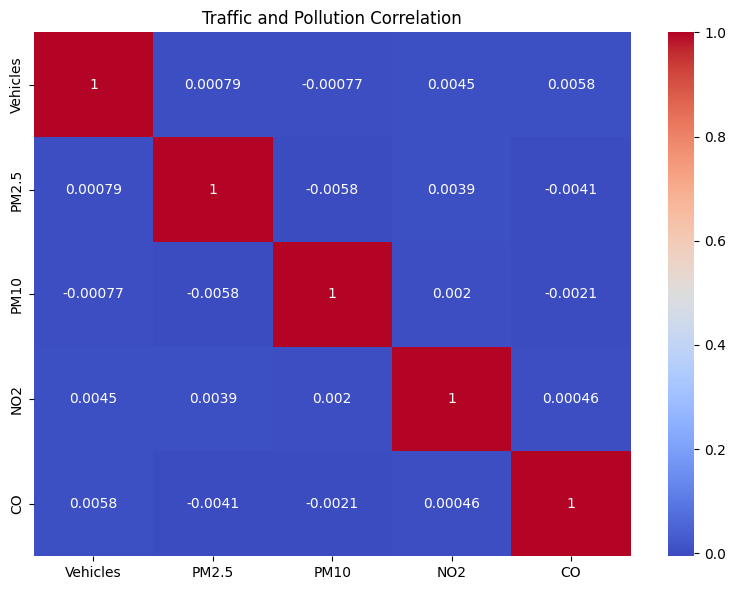

In [18]:
# Step 6: Correlation Matrix
correlation = data[["Vehicles", "PM2.5", "PM10", "NO2", "CO"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Traffic and Pollution Correlation")
plt.tight_layout()
plt.show()

In [19]:
# Step 7-8: Modeling
features = ["Vehicles", "hour", "dayofweek", "is_weekend"]
targets = ["PM2.5", "PM10", "NO2", "CO"]
results = {}

for target in targets:
    X = data[features]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[target] = {
        "Model": model,
        "Actual": y_test,
        "Predicted": y_pred,
        "RMSE": rmse,
        "R2": r2
    }

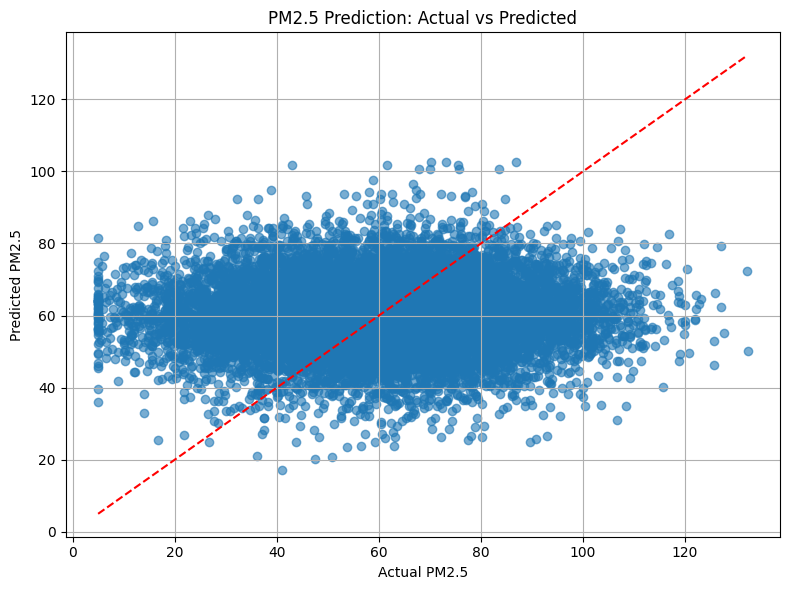

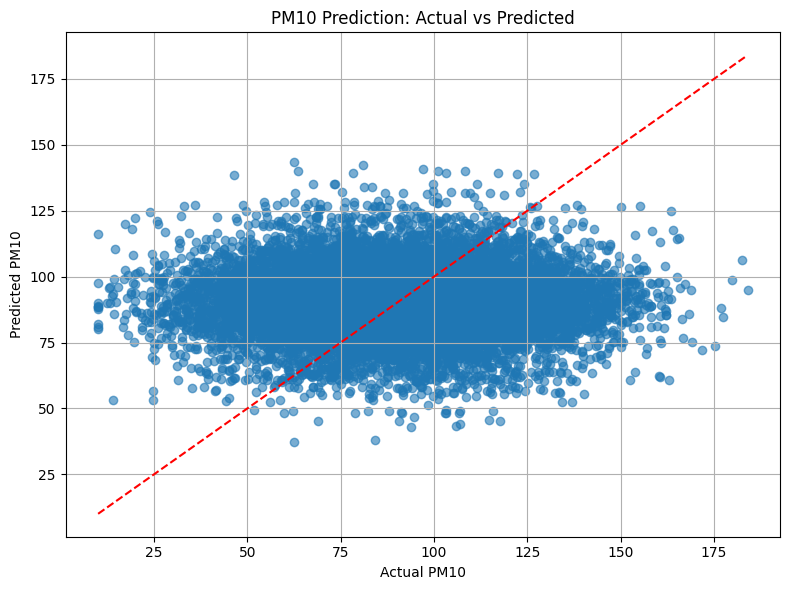

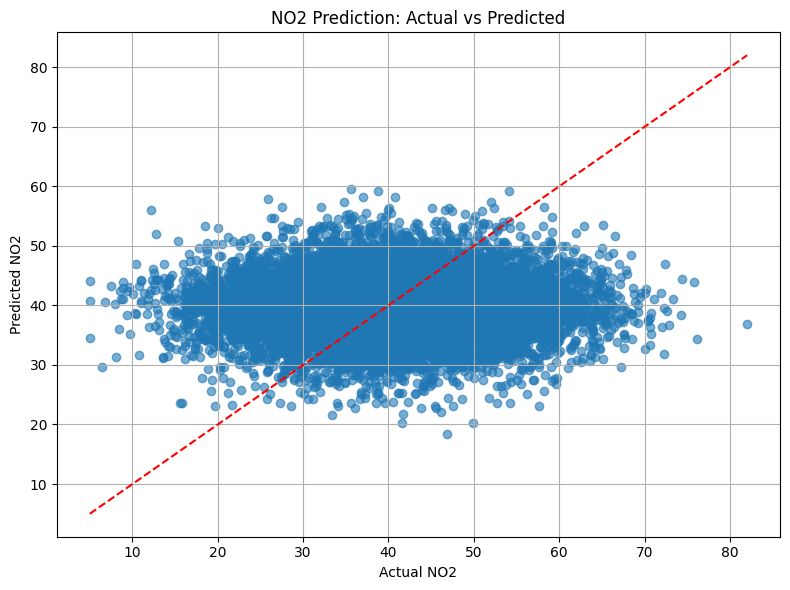

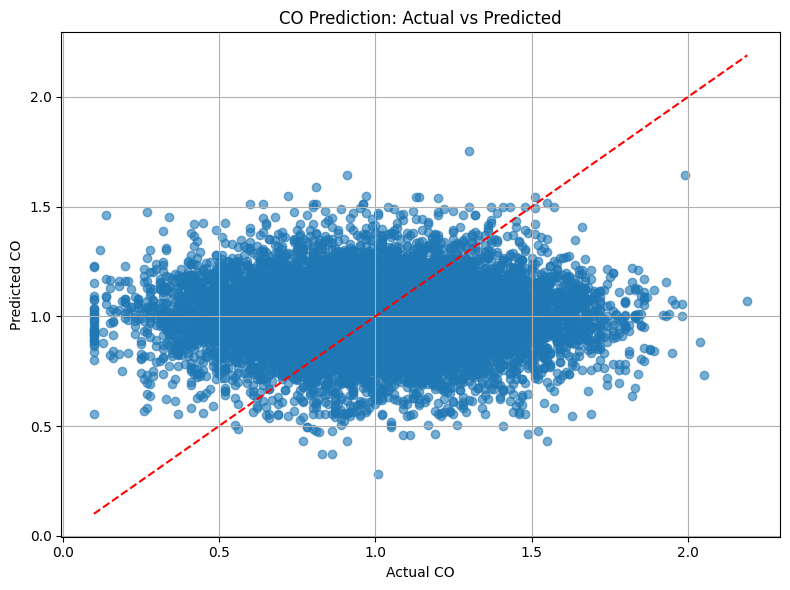

In [20]:
# Step 9: Plot Actual vs Predicted
for target in targets:
    plt.figure(figsize=(8, 6))
    plt.scatter(results[target]["Actual"], results[target]["Predicted"], alpha=0.6)
    plt.plot([results[target]["Actual"].min(), results[target]["Actual"].max()],
             [results[target]["Actual"].min(), results[target]["Actual"].max()], 'r--')
    plt.xlabel(f"Actual {target}")
    plt.ylabel(f"Predicted {target}")
    plt.title(f"{target} Prediction: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
# Step 10: Performance Summary
performance_summary = pd.DataFrame({
    target: {"RMSE": results[target]["RMSE"], "R2": results[target]["R2"]}
    for target in targets
}).T
performance_summary

,RMSE,R2
PM2.5,21.770723,-0.192174
PM10,27.784308,-0.219982
NO2,11.030903,-0.201541
CO,0.331787,-0.225916
